In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import pandas as pd

path = '~/codedata/tpai/pre/'
trainfile = 'train.csv'
train = pd.read_csv(path + trainfile)

In [2]:
print train.shape
train.head()

(3749528, 8)


,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,0,170000,NaN,3089,2798058,293,1,1
1,0,170000,NaN,1259,463234,6161,1,2
2,0,170000,NaN,4465,1857485,7434,4,1
3,0,170000,NaN,1004,2038823,977,1,1
4,0,170000,NaN,1887,2015141,3688,1,1


In [3]:
test = {}
def property(var, train):
    # 点击量的统计直方图     
    sns.distplot(train[var], kde=False)
    fig = plt.figure()
    count = train[var].value_counts()
    count_index = count.values < 5
    if count_index.any():
        train[var].replace(count[count_index].index, 10000, inplace=True)
    means = train.groupby(var)['label'].mean()
    # 根据var属性的每一个取值做均值     
    plt.scatter(x=means.index, y = means.values)
    sort_means = means.sort_values(ascending = False)
    fig = plt.figure()
    # 按顺序画散点图
    plt.scatter(x = range(0,len(sort_means)), y = sort_means.values)
    return (var, len(train[var].value_counts()), means.max() - means.min(), means.std())

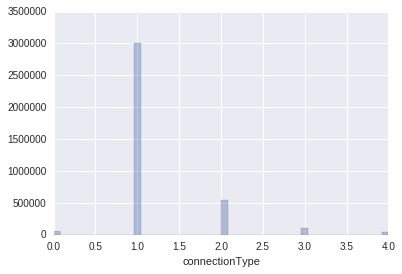

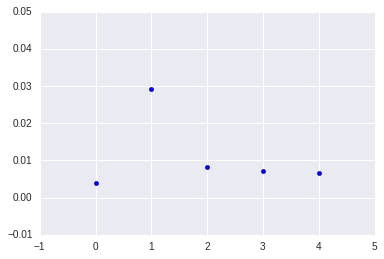

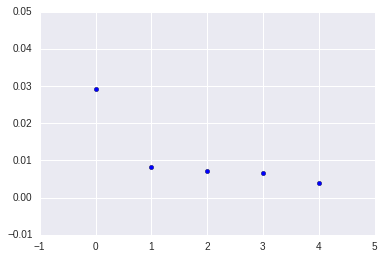

In [4]:
var = 'connectionType'
test[var] = property(var, train)

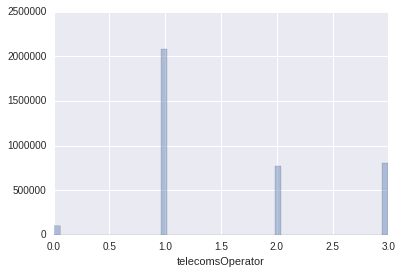

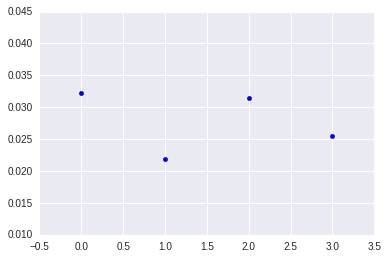

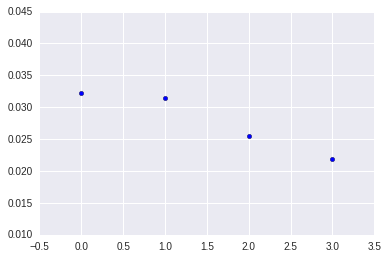

In [5]:
var = 'telecomsOperator'
test[var] = property(var, train)

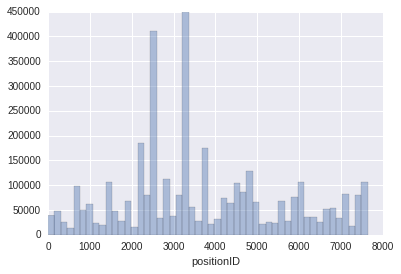

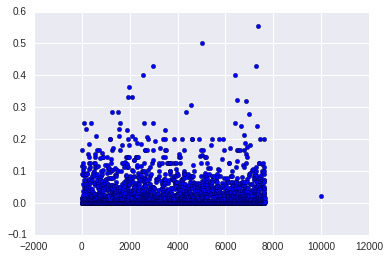

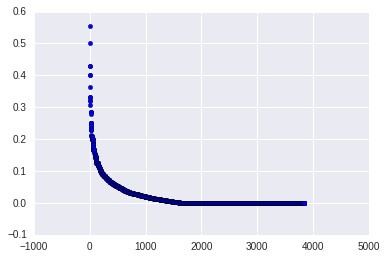

In [6]:
var = 'positionID'
test[var] = property(var, train)

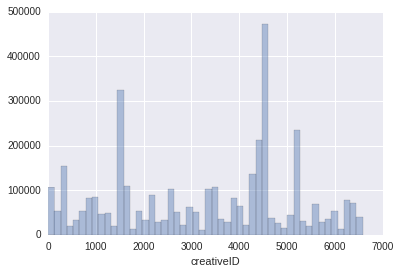

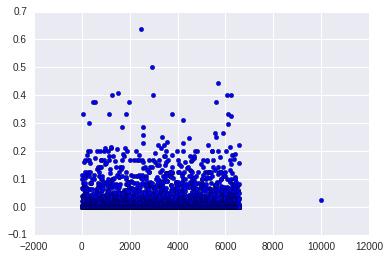

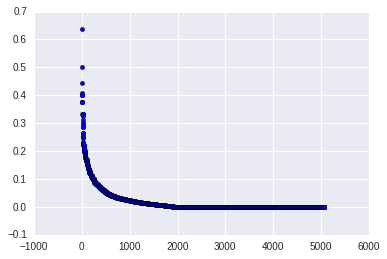

In [7]:
var = 'creativeID'
test[var] = property(var, train)

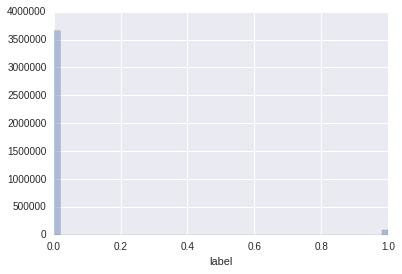

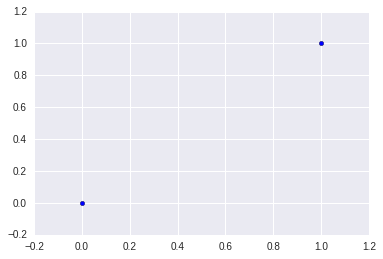

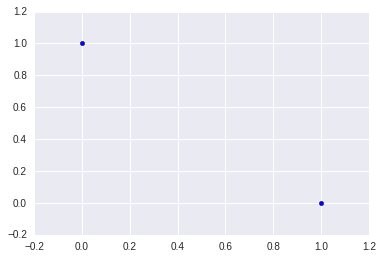

In [8]:
var = 'label'
test[var] = property(var, train)

In [9]:
# 把时间转换为以分钟为单位
def returnmin(time):
    clickT = time % 10000
    clickT = clickT.values  / 100 * 60 + clickT.values % 100
    return clickT
clickTiMin = returnmin(train['clickTime'])
converTiMin = returnmin(train['conversionTime'])
# type(clickTiMin)
train['clickTiMin'] = clickTiMin
train['converTiMin'] = converTiMin
dfTime = pd.DataFrame({'clickTiMin':clickTiMin, 'converTiMin':converTiMin})
dfTime = dfTime.fillna(0)
train['plusTime'] = dfTime['converTiMin'] - dfTime['clickTiMin']
# dfTime[dfTime['plusTime'] > 0]['plusTime'] = 0

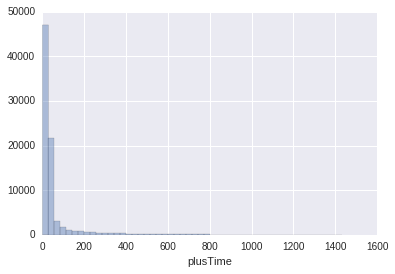

In [10]:
# fig =plt.figfure()
v = train[train['plusTime'] > 0]
# 激活的conversionTime与clickTime的时间差
sns.distplot(v['plusTime'],kde=False)

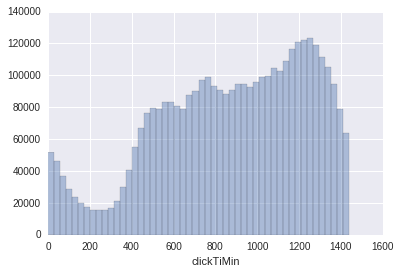

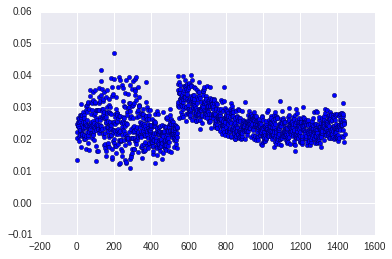

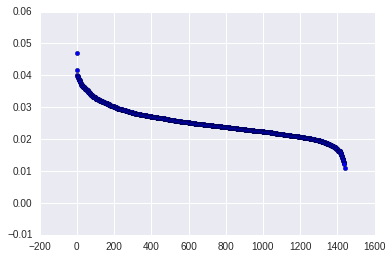

In [11]:
# 点击时间分布
var = 'clickTiMin'
test[var] = property(var, train)

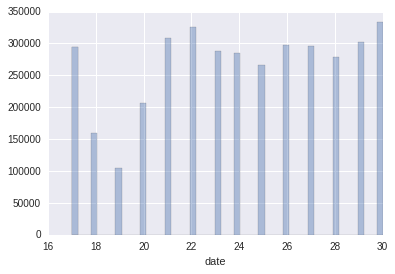

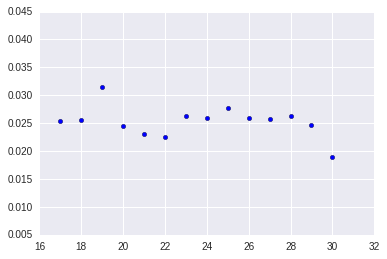

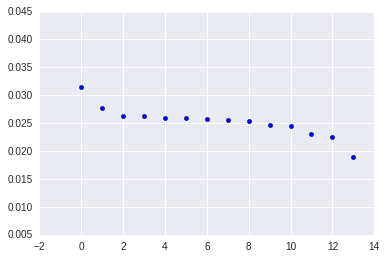

In [12]:
var = 'date'
train[var] = (train['clickTime'].values) / 10000
test[var] = property(var, train)

In [13]:
for (k,v) in test.items():
    print v

('positionID', 3847, 0.55555555555555558, 0.04342841722528238)
('connectionType', 5, 0.025336495627940228, 0.010308483261562163)
('label', 2, 1, 0.70710678118654757)
('clickTiMin', 1440, 0.036250853630776236, 0.0048289329274051728)
('date', 14, 0.012684419215962309, 0.0028077837477102278)
('creativeID', 5072, 0.63636363636363635, 0.042571135930954719)
('telecomsOperator', 4, 0.010404207972994964, 0.0049696062876111837)


In [14]:
train['label'].value_counts()

0    3656266
1      93262
Name: label, dtype: int64

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,clickTiMin,converTiMin,plusTime,date
label,1.000000,-0.004664,NaN,-0.016854,-0.000788,-0.022897,-0.042142,0.010989,-0.005954,NaN,0.353636,-0.004579
clickTime,-0.004664,1.000000,0.991996,-0.059187,0.002353,-0.017227,-0.051407,0.025443,0.080319,0.035243,-0.076475,0.999885
conversionTime,NaN,0.991996,1.000000,-0.041536,0.004742,0.002130,-0.047888,0.010187,0.067367,0.016963,-0.075957,0.991797
creativeID,-0.016854,-0.059187,-0.041536,1.000000,-0.000526,0.041634,0.013451,-0.023057,-0.001697,0.075734,-0.002441,-0.059227
userID,-0.000788,0.002353,0.004742,-0.000526,1.000000,0.000311,-0.001962,-0.001104,0.002584,0.000557,-0.002695,0.002316
positionID,-0.022897,-0.017227,0.002130,0.041634,0.000311,1.000000,0.086035,-0.026756,0.017494,0.051672,-0.023383,-0.017514
connectionType,-0.042142,-0.051407,-0.047888,0.013451,-0.001962,0.086035,1.000000,-0.068833,-0.016796,0.014629,0.001339,-0.051208
telecomsOperator,0.010989,0.025443,0.010187,-0.023057,-0.001104,-0.026756,-0.068833,1.000000,0.009359,-0.009089,-0.005198,0.025328
clickTiMin,-0.005954,0.080319,0.067367,-0.001697,0.002584,0.017494,-0.016796,0.009359,1.000000,0.773282,-0.926451,0.065207
converTiMin,NaN,0.035243,0.016963,0.075734,0.000557,0.051672,0.014629,-0.009089,0.773282,1.000000,0.312836,0.023480


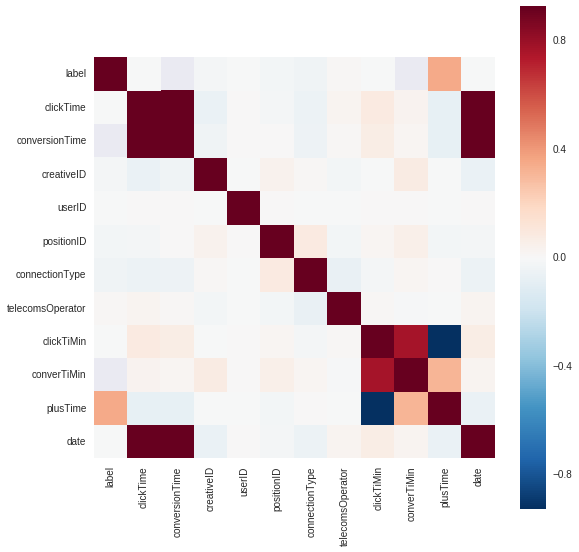

In [15]:
corrmat =  train.corr()
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(corrmat, vmax=.8, square=True)
corrmat